In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, BayesianRidge
import statsmodels.formula.api as sm
import matplotlib.pylab as plt
from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score

no display found. Using non-interactive Agg backend


6.1

In [4]:
bostonDF = pd.read_csv('/Users/jorgemolina/Desktop/school stuff and pdfs/MSBA/spring 2024/springModule2/6359Francis/DMBA-R-datasets/DMBA-R-datasets/BostonHousing.csv')
print(bostonDF)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     PTRATIO  LSTAT  MEDV  CAT. MEDV  
0       15.3   4.98  24.0          0  
1       17.8   9.14  21.6          0  
2     

In [6]:
predictors = ['CRIM', 'CHAS', 'RM']
outcome = 'MEDV'

In [8]:
x =  pd.get_dummies(bostonDF[predictors], drop_first=True)
y = bostonDF[outcome]
train_x, valid_x, train_y, valid_y = train_test_split(x, y, test_size = 0.4, random_state = 1)

In [10]:
bostonLM = LinearRegression()
bostonLM.fit(train_x, train_y)

LinearRegression()

In [12]:
print(pd.DataFrame({'Predictor': x.columns, 'coefficient': bostonLM.coef_}))

  Predictor  coefficient
0      CRIM    -0.240062
1      CHAS     3.266817
2        RM     8.325175


In [14]:
regressionSummary(train_y, bostonLM.predict(train_x))


Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 5.9666
            Mean Absolute Error (MAE) : 3.9668
          Mean Percentage Error (MPE) : -7.2747
Mean Absolute Percentage Error (MAPE) : 22.5927


In [16]:
CRIM_coef = -0.240062
CHAS_coef = 3.266817
RM_coef = 8.325175
trueMEDV = bostonLM.predict([[CRIM_coef, CHAS_coef, RM_coef]])
print("True Median House Price:", trueMEDV)

True Median House Price: [50.84479785]


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [18]:
eCRIM = 0.1
eCHAS = 0
eRM = 6
predictedMEDV = bostonLM.predict([[eCRIM, eCHAS, eRM]])
print("Predicted Median House Price:", predictedMEDV)

Predicted Median House Price: [20.73357813]


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [20]:
prediction_error = trueMEDV - predictedMEDV
print("Prediction Error:", prediction_error)

Prediction Error: [30.11121972]


i. 
corr matrix for NOX, TAX, INDUS

In [23]:
import seaborn as sns

In [25]:
selected_predictors = ['NOX', 'TAX', 'INDUS']
subBoston = bostonDF[selected_predictors]
print(subBoston)

       NOX  TAX  INDUS
0    0.538  296   2.31
1    0.469  242   7.07
2    0.469  242   7.07
3    0.458  222   2.18
4    0.458  222   2.18
..     ...  ...    ...
501  0.573  273  11.93
502  0.573  273  11.93
503  0.573  273  11.93
504  0.573  273  11.93
505  0.573  273  11.93

[506 rows x 3 columns]


In [27]:
corrMatrix = subBoston.corr()

In [29]:
plt.figure(figsize = (8,6))
sns.heatmap(corrMatrix, annot = True, cmap = 'coolwarm', fmt = "0.2f")
plt.title('Correlation Matrix: NOX, TAX, and, INDUS')
plt.savefig('corrMatrix.png')

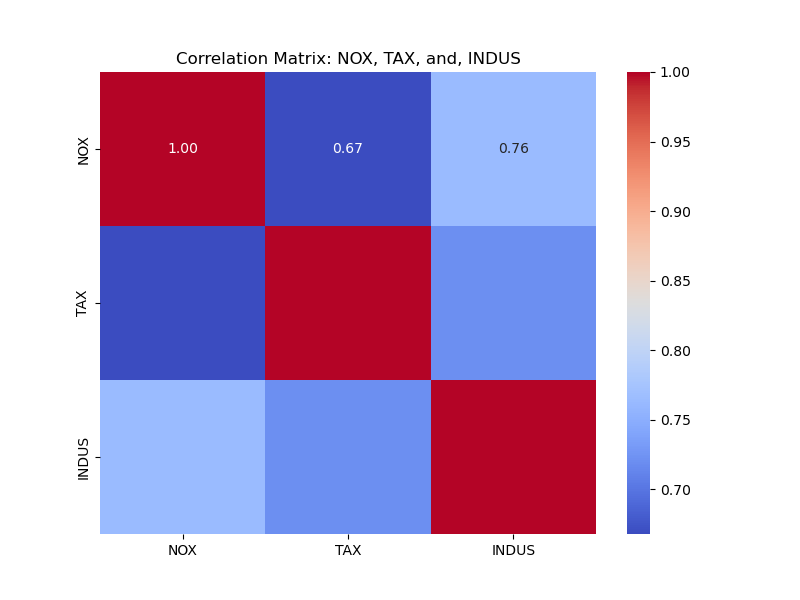

In [31]:
from IPython.display import Image
Image('corrMatrix.png')

ii. 
corr matrix for BostonHousing.csv

In [34]:
bostonMatrix = bostonDF.corr()
print(bostonMatrix)

               CRIM        ZN     INDUS      CHAS       NOX        RM  \
CRIM       1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247   
ZN        -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991   
INDUS      0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676   
CHAS      -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251   
NOX        0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188   
RM        -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000   
AGE        0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265   
DIS       -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246   
RAD        0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847   
TAX        0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048   
PTRATIO    0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501   
LSTAT      0.455621 -0.412995  0.603800 -0.053929  0.590879 -0.613808   
MEDV      -0.388305  0.360445 -0.483725  0.175260 -

In [36]:
sortedBoston = bostonMatrix.abs()
pairsBoston = sortedBoston.stack()
sortedpairs = pairsBoston.sort_values(ascending = False) 
print(sortedpairs.head(25))

CRIM       CRIM         1.000000
ZN         ZN           1.000000
MEDV       MEDV         1.000000
LSTAT      LSTAT        1.000000
PTRATIO    PTRATIO      1.000000
TAX        TAX          1.000000
RAD        RAD          1.000000
DIS        DIS          1.000000
AGE        AGE          1.000000
RM         RM           1.000000
NOX        NOX          1.000000
CHAS       CHAS         1.000000
INDUS      INDUS        1.000000
CAT. MEDV  CAT. MEDV    1.000000
RAD        TAX          0.910228
TAX        RAD          0.910228
MEDV       CAT. MEDV    0.789789
CAT. MEDV  MEDV         0.789789
NOX        DIS          0.769230
DIS        NOX          0.769230
NOX        INDUS        0.763651
INDUS      NOX          0.763651
DIS        AGE          0.747881
AGE        DIS          0.747881
MEDV       LSTAT        0.737663
dtype: float64


iii. step wise regression

backward: 


In [40]:
bostonx = bostonDF.drop(columns = ['MEDV'])
bostony = bostonDF['MEDV']
train_bostonx, valid_bostonx, train_bostony, valid_bostony = train_test_split(bostonx, bostony, test_size = 0.4, random_state = 1)

In [42]:
def train_model(variables): 
    model = LinearRegression()
    model.fit(train_bostonx[variables], train_bostony)
    return model

In [44]:
def score_model(model, variables):
    return AIC_score(train_bostony, model.predict(train_bostonx[variables]), model)

In [46]:
allVariables = train_bostonx.columns
best_model, best_backward = backward_elimination(allVariables, train_model, score_model, verbose = True)
print(best_backward)

Variables: CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD, TAX, PTRATIO, LSTAT, CAT. MEDV
Start: score=1663.52
Step: score=1661.68, remove AGE
Step: score=1660.02, remove ZN
Step: score=1660.02, remove None
['CRIM', 'INDUS', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT', 'CAT. MEDV']


In [48]:
regressionSummary(valid_bostony, best_model.predict(valid_bostonx[best_backward]))


Regression statistics

                      Mean Error (ME) : 0.4505
       Root Mean Squared Error (RMSE) : 3.8674
            Mean Absolute Error (MAE) : 2.7724
          Mean Percentage Error (MPE) : -2.1963
Mean Absolute Percentage Error (MAPE) : 13.3441


forward:

In [51]:
def train_model(variables):
    if len(variables) == 0:
        return None
    model = LinearRegression()
    model.fit(train_bostonx[variables], train_bostony)
    return model

In [53]:
def score_model(model, variables):
    if len (variables) == 0:
        return AIC_score(train_bostony, [train_bostony.mean()] * len(train_bostony), model, df = 1)
    return AIC_score(train_bostony, model.predict(train_bostonx[variables]), model)

In [55]:
best_model, best_forward = forward_selection(train_bostonx.columns, train_model, score_model, verbose = True)
print(best_forward)

Variables: CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD, TAX, PTRATIO, LSTAT, CAT. MEDV
Start: score=2191.75, constant
Step: score=1911.93, add CAT. MEDV
Step: score=1716.45, add LSTAT
Step: score=1699.98, add CRIM
Step: score=1692.34, add CHAS
Step: score=1685.94, add PTRATIO
Step: score=1682.90, add RM
Step: score=1680.20, add DIS
Step: score=1665.78, add NOX
Step: score=1660.42, add RAD
Step: score=1660.42, add None
['CAT. MEDV', 'LSTAT', 'CRIM', 'CHAS', 'PTRATIO', 'RM', 'DIS', 'NOX', 'RAD']


In [57]:
regressionSummary(valid_bostony, best_model.predict(valid_bostonx[best_forward]))


Regression statistics

                      Mean Error (ME) : 0.4321
       Root Mean Squared Error (RMSE) : 3.9314
            Mean Absolute Error (MAE) : 2.8585
          Mean Percentage Error (MPE) : -2.3792
Mean Absolute Percentage Error (MAPE) : 13.8040


stepwise:

In [60]:
best_model, best_variables = stepwise_selection(train_bostonx.columns, train_model, score_model, verbose = True)
print(best_variables)

Variables: CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD, TAX, PTRATIO, LSTAT, CAT. MEDV
Start: score=2191.75, constant
Step: score=1911.93, add CAT. MEDV
Step: score=1716.45, add LSTAT
Step: score=1699.98, add CRIM
Step: score=1692.34, add CHAS
Step: score=1685.94, add PTRATIO
Step: score=1682.90, add RM
Step: score=1680.20, add DIS
Step: score=1665.78, add NOX
Step: score=1660.42, add RAD
Step: score=1660.42, unchanged None
['CAT. MEDV', 'LSTAT', 'CRIM', 'CHAS', 'PTRATIO', 'RM', 'DIS', 'NOX', 'RAD']


In [62]:
regressionSummary(valid_bostony, best_model.predict(valid_bostonx[best_variables]))


Regression statistics

                      Mean Error (ME) : 0.4321
       Root Mean Squared Error (RMSE) : 3.9314
            Mean Absolute Error (MAE) : 2.8585
          Mean Percentage Error (MPE) : -2.3792
Mean Absolute Percentage Error (MAPE) : 13.8040
